<a href="https://colab.research.google.com/github/jegot/frankAInstein/blob/main/stablediffusion_10iterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
from PIL import Image
import torch
from diffusers import StableDiffusionImg2ImgPipeline, DDIMScheduler
!pip install diffusers accelerate transformers


#Deepseek used for code assistance

# Upload images
print("Please upload 10 images for training.")
uploaded = files.upload()

uploaded_images = []
for filename in uploaded.keys():
    img = Image.open(filename).convert("RGB")
    uploaded_images.append(img)

print(f"Uploaded {len(uploaded_images)} images.")

# Load model
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    scheduler=DDIMScheduler.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="scheduler")
)
pipe = pipe.to("cuda")

def multi_image_generation(pipe, images, prompt, num_iterations=3):
    """Generate image using multiple reference images through iterative refinement"""

    # Start with the first image
    current_image = images[0]

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")

        # Blend current image with next reference image
        if iteration < len(images) - 1:
            # Create a blended image
            blend_ratio = 0.3  # How much of the next image to blend in
            next_img = images[iteration + 1].resize(current_image.size)

            # Simple alpha blending
            blended = Image.blend(current_image, next_img, blend_ratio)
            current_image = blended

        # Apply img2img transformation
        current_image = pipe(
            prompt=prompt,
            image=current_image,
            strength=0.5,  # Moderate strength for gradual transformation
            guidance_scale=7.5
        ).images[0]

    return current_image

# Generate using all images
prompt = "cartoon style, incorporate elements from all reference images"
result = multi_image_generation(pipe, uploaded_images, prompt)

result.save("output_multi_ref.png")
print("Multi-reference generation complete! Saved as output_multi_ref.png")
result.show()

Please upload 10 images for training.


Saving e83db7072afd013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg to e83db7072afd013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
Saving e83db7072df6033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg to e83db7072df6033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
Saving e83db50920f4013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg to e83db50920f4013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
Saving e130b80b2ef11c22d2524518b7444f92e37fe5d404b0144390f8c07aa4e5b0_640.jpg to e130b80b2ef11c22d2524518b7444f92e37fe5d404b0144390f8c07aa4e5b0_640.jpg
Saving e131b0072ee90021d85a5854ee454296eb70e3c818b413449df1c27ba6ee_640.jpg to e131b0072ee90021d85a5854ee454296eb70e3c818b413449df1c27ba6ee_640.jpg
Saving e132b10a2bf51c22d2524518b7444f92e37fe5d404b0144390f8c07aa4e5b0_640.jpg to e132b10a2bf51c22d2524518b7444f92e37fe5d404b0144390f8c07aa4e5b0_640.jpg
Saving e133b10d2bf21c22d2524518b7444f92e37fe5d404b0144390f8c07aa4e5b0_640.jpg to

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Iteration 1/3


  0%|          | 0/25 [00:00<?, ?it/s]

Iteration 2/3


  0%|          | 0/25 [00:00<?, ?it/s]

Iteration 3/3


  0%|          | 0/25 [00:00<?, ?it/s]

Multi-reference generation complete! Saved as output_multi_ref.png


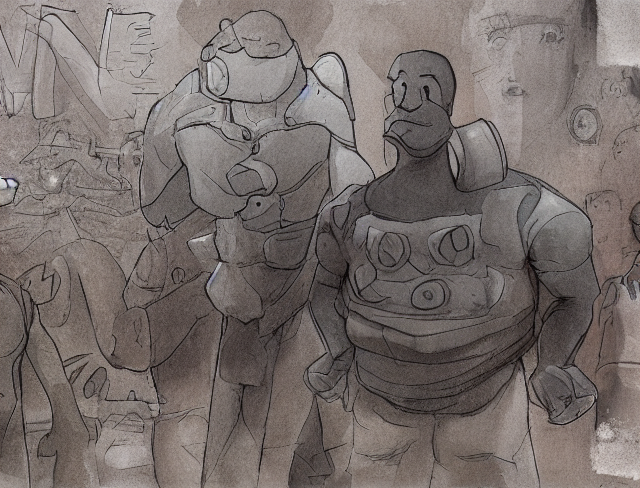

In [4]:
from IPython.display import display
from PIL import Image

# Open the saved image file
output_image = Image.open("output_multi_ref.png")

# Display the image
display(output_image)

#image below used 10 elephant pictures   vvvv